# Monte Carlo

In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import streamlit as st

c:\Users\Ya Chiao Tsai\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Import Data /Data Understanding

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


             AAPL        MSFT        AMZN       GOOGL        META        NFLX  \
count  779.000000  779.000000  779.000000  779.000000  779.000000  779.000000   
mean   157.139256  289.783890  138.887969  120.084409  258.822516  414.751951   
std     20.361119   44.091946   27.230162   17.611852   81.009445  132.539233   
min    116.360001  212.250000   81.820000   83.430000   88.910004  166.369995   
25%    142.449997  252.485001  115.520000  104.705002  187.230003  317.050003   
50%    153.850006  286.140015  142.643005  120.900002  278.010010  418.059998   
75%    174.035004  324.195007  163.255997  135.884254  327.805008  517.744995   
max    198.110001  414.049988  186.570496  153.509995  474.989990  691.690002   

              VTI         SPY         JNJ          KO         XLK         XLF  
count  779.000000  779.000000  779.000000  779.000000  779.000000  779.000000  
mean   214.039191  422.888036  165.897291   58.582901  151.259397   35.312734  
std     15.278543   29.973970 

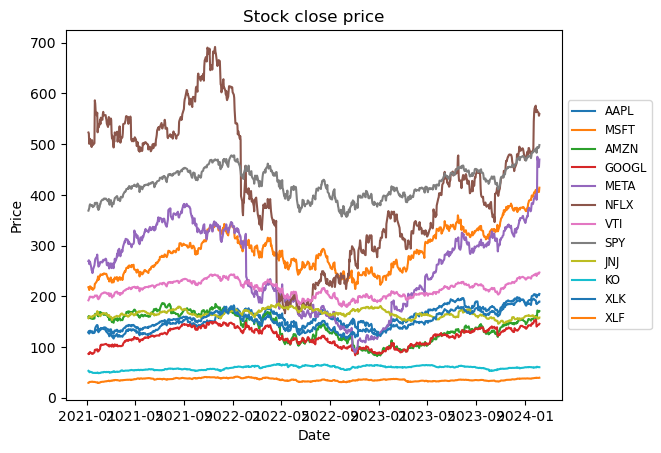

In [166]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'NFLX', 'VTI', 'SPY', 'JNJ', 'KO', 'XLK', 'XLF']
Close = pd.DataFrame()
start_date = '2021-01-01'

for ticker in tickers:
    Close[ticker] = yf.download(ticker, start= start_date, end='2024-12-31')['Close']

print(Close.describe())

plt.plot(Close.index, Close)
plt.title('Stock close price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(Close, fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

              AAPL         MSFT         AMZN        GOOGL         META  \
count  6062.000000  6062.000000  6062.000000  4900.000000  2948.000000   
mean      0.001183     0.000509     0.001088     0.001014     0.001174   
std       0.024703     0.019267     0.031488     0.019344     0.025488   
min      -0.518692    -0.155978    -0.247661    -0.116341    -0.263901   
25%      -0.010085    -0.008313    -0.012017    -0.007969    -0.010013   
50%       0.000857     0.000339     0.000489     0.000784     0.001041   
75%       0.012921     0.009420     0.013726     0.010136     0.012897   
max       0.139049     0.195652     0.344714     0.199915     0.296115   

              NFLX          VTI          SPY          JNJ           KO  \
count  5464.000000  5696.000000  6062.000000  6062.000000  6062.000000   
mean      0.001762     0.000336     0.000280     0.000277     0.000210   
std       0.035465     0.012221     0.012369     0.012133     0.013061   
min      -0.409065    -0.113809    -0

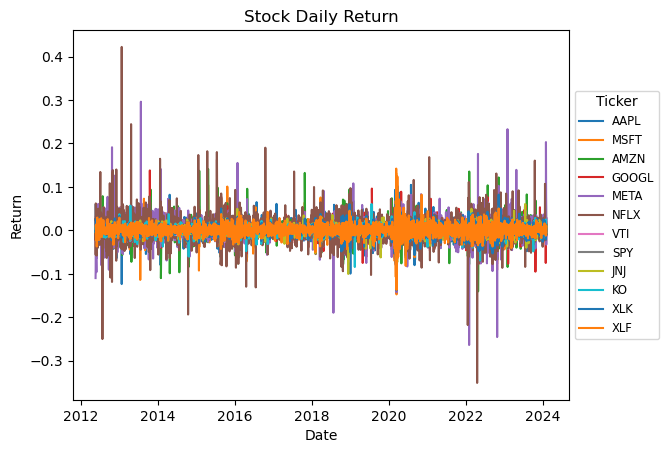

In [78]:
Return = Close.pct_change()
print(Return.describe())
Return = Return.dropna()

plt.plot(Return.index, Return)
plt.title('Stock Daily Return')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(Return, title = "Ticker", fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

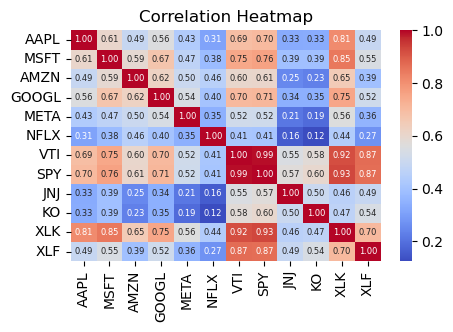

In [90]:
mean_sd_return = pd.DataFrame({'mean': Return.mean(), 'std': Return.std()}).T
mat_cor = Return.corr()

plt.figure(figsize= (5, 3))
sns.heatmap(mat_cor, annot = True, cmap = 'coolwarm', fmt=".2f", annot_kws={"size": 6})
plt.title('Correlation Heatmap')
plt.show()

## Monte Carlo

Define the Weights for the stocks

In [104]:
T = (Return.index.max() - Return.index.min()).days

[0.14543189 0.00488515 0.20298796 0.10201309 0.00428994 0.14275553
 0.07263597 0.00355678 0.03707764 0.10209117 0.08695927 0.09531562]


In [160]:
n_simulation = 20000


In [161]:
simulation_output = {'weights': [], 'perform': {'return': [], 'std': []}}

for i in range(0, n_simulation):

    weights = np.random.random(len(Return.columns))
    weights /= np.sum(weights)

    wtRet = (Return * weights).sum(axis=1)

    simulation_output['weights'].append(weights)
    simulation_output['perform']['return'].append(wtRet.mean())
    simulation_output['perform']['std'].append(wtRet.std())

simulation_output['weights'] = pd.DataFrame(simulation_output['weights'])
simulation_output['weights'].columns = tickers
perform = pd.concat([simulation_output['weights'],
                     pd.DataFrame(simulation_output['perform'])], axis = 1)

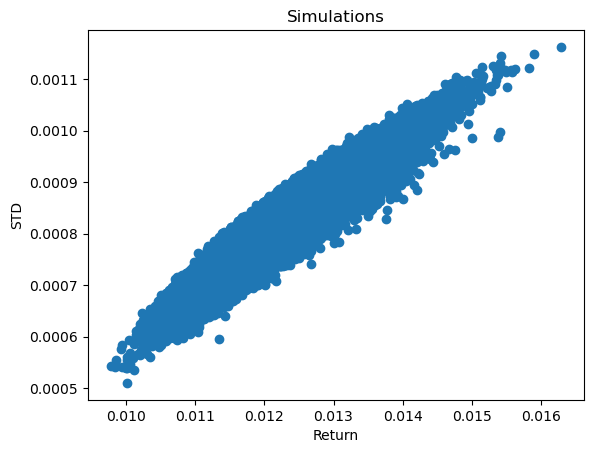

In [164]:
plt.title('Simulations')
plt.xlabel('Return')
plt.ylabel('STD')
plt.scatter(perform['std'], perform['return'])
plt.show()

## Build Streamlit API